In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Analyze Data

In [2]:
!ls -lrt ../data/

total 203472
-rw-r--r--  1 gbemidebe  staff  36098277 Apr  2 15:54 test.csv
-rw-r--r--  1 gbemidebe  staff   8943680 Apr  2 15:54 sample_submission.csv
-rw-r--r--  1 gbemidebe  staff  59127674 Apr  2 15:54 train.csv


In [3]:
data = pd.read_csv('../data/train.csv')

In [4]:
data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [5]:
# drop column id
data.drop('id', axis=1, inplace=True)

In [6]:
# columns in data
data.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [7]:
# get the types of columns
data.dtypes

MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

In [8]:
# check if it has any missing values
data.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [9]:
# for the non-object columns, get the summary statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000
Encroachments,1117957.0,4.949230,2.083324,0.000,4.00,5.000,6.00,18.000


<Axes: xlabel='FloodProbability', ylabel='Count'>

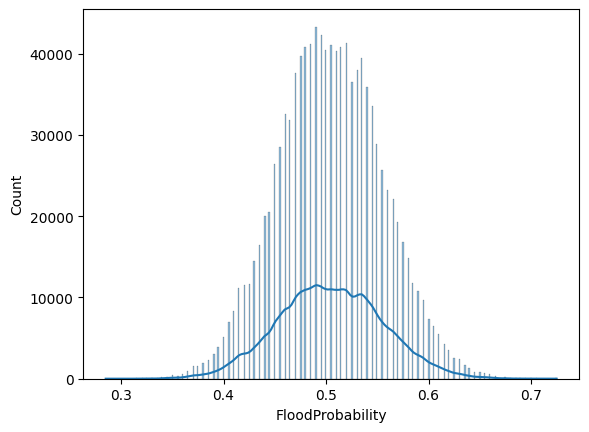

In [10]:
# show the distribution of the target variable
sns.histplot(data['FloodProbability'], kde=True, label='FloodProbability')

In [11]:
# print length of columns
print(len(data.columns))


21


In [12]:
X = data.drop('FloodProbability', axis=1)
y = data['FloodProbability']

In [13]:
# print length of columns X and y
print(len(X.columns), len(y))


20 1117957


In [14]:
# split into train and test
from sklearn.model_selection import train_test_split
# divide the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# split test set into validation and test sets (10% validation, 10% test)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Hyperparameter Search

In [15]:
import mlflow
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from hyperopt.pyll import scope
from sklearn.metrics import r2_score, root_mean_squared_error

In [16]:
!pwd

/Users/gbemidebe/Documents/GitHub/myKAGGLEworks/KaggleFloodProbability/notebooks


In [17]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("hyperopt")

2024/05/31 16:35:14 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2024/05/31 16:35:14 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

<Experiment: artifact_location='/Users/gbemidebe/Documents/GitHub/myKAGGLEworks/KaggleFloodProbability/notebooks/mlruns/1', creation_time=1717191314855, experiment_id='1', last_update_time=1717191314855, lifecycle_stage='active', name='hyperopt', tags={}>

In [18]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50, verbose_eval=False
        )
        y_pred = booster.predict(valid)
        rmse = root_mean_squared_error(y_val, y_pred)
        #r2_val = r2_score(y_val, y_pred)
        #mlflow.log_metric("r2", r2_val)

    # return {'loss': -1*r2_val, 'status': STATUS_OK}
    return {'loss': rmse, 'status': STATUS_OK}

In [19]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 10, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:squarederror',
    'seed': 42 #hp.randint('seed', 100000),
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=100,
    trials=Trials(), 
)

100%|██████████| 100/100 [1:53:19<00:00, 68.00s/trial, best loss: 0.020772449479402016]  


In [20]:
best_result

{'learning_rate': 0.058006975287638395,
 'max_depth': 10.0,
 'min_child_weight': 4.938139786048474,
 'reg_alpha': 0.07241302640260788,
 'reg_lambda': 0.013048611802146622}

## Train best Model

In [21]:
import pickle

mlflow.set_experiment("best_model_xgboost")

with mlflow.start_run():
    
    train = xgb.DMatrix(X_train, label=y_train)
    valid = xgb.DMatrix(X_val, label=y_val)

    mlflow.xgboost.autolog()

    # set the best hyperparameters
    best_result['max_depth'] = int(best_result['max_depth'])

    booster = xgb.train(
        params=best_result,
        dtrain=train,
        num_boost_round=1000,
        evals=[(valid, 'validation')],
        early_stopping_rounds=50, verbose_eval=False
    )

    r2_train = r2_score(y_train, booster.predict(train))
    r2_val = r2_score(y_val, booster.predict(valid))

    print(f"Train R2: {r2_train:.2f}")
    print(f"Validation R2: {r2_val:.2f}")


2024/05/31 18:29:30 INFO mlflow.tracking.fluent: Experiment with name 'best_model_xgboost' does not exist. Creating a new experiment.
2024/05/31 18:29:59 WARNING mlflow.xgboost: Failed to infer model signature: could not sample data to infer model signature: please ensure that autologging is enabled before constructing the dataset.
2024/05/31 18:29:59 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/gbemidebe/miniconda3/envs/exp-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [18:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified."


Train R2: 0.89
Validation R2: 0.83


In [22]:
r2_train = r2_score(y_train, booster.predict(train))
r2_val = r2_score(y_val, booster.predict(valid))
r2_test = r2_score(y_test, booster.predict(xgb.DMatrix(X_test, label=y_test)))

print(f"Train R2: {r2_train:.2f}")
print(f"Validation R2: {r2_val:.2f}")
print(f"Test R2: {r2_test:.2f}")

Train R2: 0.89
Validation R2: 0.83
Test R2: 0.83


## Test model

In [29]:
test_data_orig = pd.read_csv('../data/test.csv')
print(test_data_orig.shape)
test_data_orig.head()

(745305, 21)


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [30]:
# ensure the columns are in the same order as the training data
test_data =  test_data_orig[X.columns]
print(test_data.shape)
test_data.head()

(745305, 20)


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [31]:
# predict the price
y_pred_test = booster.predict(xgb.DMatrix(test_data))

In [32]:
# append the predictions as price to the test data and save the id and price columns
test_data_orig['FloodProbability'] = y_pred_test

In [33]:
# save the test data with the predictions as a csv file. add date to the filename
from datetime import datetime
file_path = f'../data/xgboost_predictions_{datetime.now().strftime("%Y%m%d%H%M%S")}.csv'
test_data_orig[['id', 'FloodProbability']].to_csv(file_path, index=False)

In [ ]:
# submit the file to kaggle
!kaggle competitions submit -c playground-series-s4e5 -f file_path -m "XGBoost with hyperopt-1st submission"